# Image Classification Using Convolutional Neural Network (CNN)¶

- In this notebook, we will classify small images CIFAR-10 dataset from tensorflow keras datasets.

1. There are total 10 classes as shown below. We will use CNN for classification


2. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 


3. There are 50000 training images and 10000 test images.


4. The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

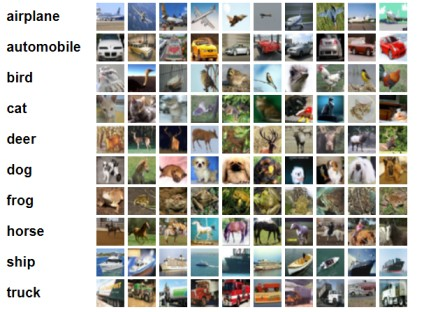

1. Here we use a dataset name : CIFAR

2. It containes 60000 images and 10 classes

3. Each class containes 6000 images

3. Data set is divided into two parts training images: 50,000

4. testing images: 10,000

# 1.Import Python modules

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from sklearn.metrics import confusion_matrix
from PIL import Image

# 2. Load the dataset

In [65]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print("X Train:",X_train.shape)
print("X Test:", X_test.shape)
print("y Train:",y_train.shape)
print("y Test:",y_test.shape)

X Train: (50000, 32, 32, 3)
X Test: (10000, 32, 32, 3)
y Train: (50000, 1)
y Test: (10000, 1)


In [66]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print("y Train:",y_train.shape)
print("y Test:",y_test.shape)

y Train: (50000,)
y Test: (10000,)


In [67]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [68]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (12,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
    print(classes[Y[index]])
    plt.show()

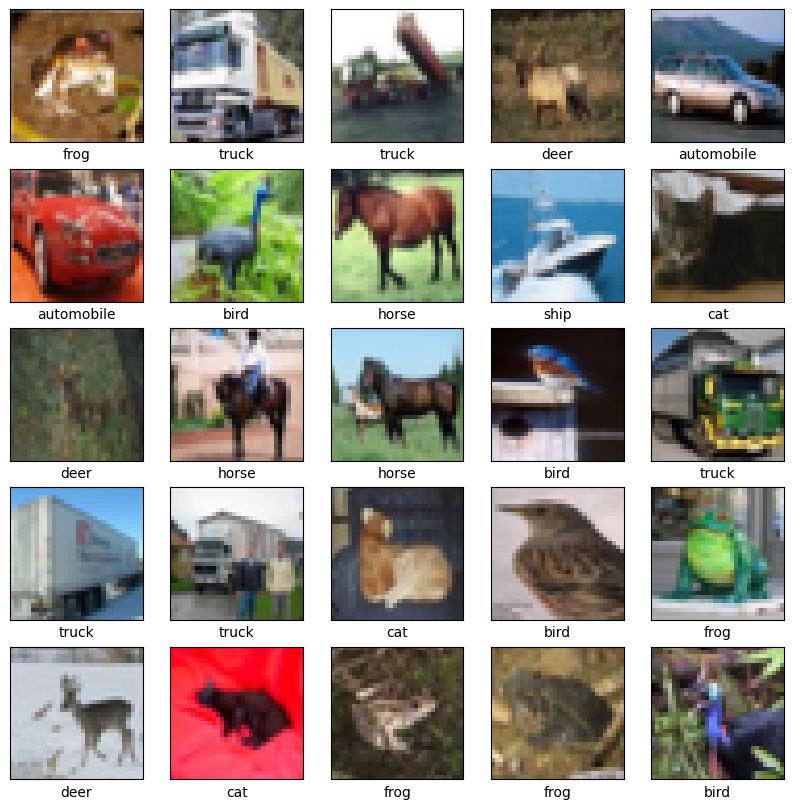

In [69]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(classes[y_train[i]])
plt.show()

# 3.Normalizing the training data

In [70]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#  4. Build a convolutional neural network 

In [71]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [72]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

# 5. Model Compile

In [73]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss
              metrics=['accuracy'])


history=cnn.fit(X_train, y_train, epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 17s 10ms/step - loss: 1.5474 - accuracy: 0.4343 - val_loss: 1.2436 - val_accuracy: 0.5516
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1628 - accuracy: 0.5900 - val_loss: 1.0737 - val_accuracy: 0.6237
Epoch 3/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0178 - accuracy: 0.6432 - val_loss: 1.0100 - val_accuracy: 0.6468
Epoch 4/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9175 - accuracy: 0.6803 - val_loss: 0.9505 - val_accuracy: 0.6723
Epoch 5/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8465 - accuracy: 0.7056 - val_loss: 0.9101 - val_accuracy: 0.6850
Epoch 6/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7848 - accuracy: 0.7268 - val_loss: 0.8804 - val_accuracy: 0.6914
Epoch 7/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7332 - accuracy: 0.7418 - val_loss: 0.8705 - val_a

# 6. Model Predictions & Performance

In [74]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.5866 - accuracy: 0.6987
0.6987000107765198


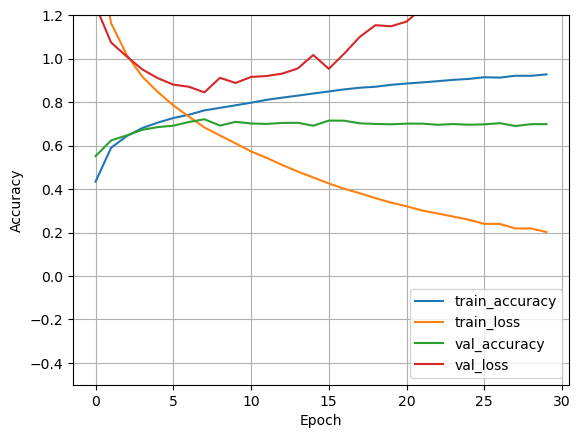

In [75]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

In [76]:

y_pred = cnn.predict(X_test)
max_prob=[np.max(i)  for i in y_pred]
index=[np.argmax(i) for i in y_pred]
prediction_class=[classes[i] for i in index]
Ground_Truth_class=[classes[i] for i in y_test]

d1=pd.DataFrame(zip(max_prob,index,prediction_class,Ground_Truth_class),
             columns=['Max_proba','Index','Prediction_class','Ground_Truth_class'])
con=d1['Prediction_class']==d1['Ground_Truth_class']
d1['output']=np.where(con,1,0)
accuracy=d1['output'].sum()/len(d1['output'])
accuracy

313/313 [==============================] - 1s 2ms/step


0.6987

In [77]:
d1

,Max_proba,Index,Prediction_class,Ground_Truth_class,output
0,0.725363,3,cat,cat,1
1,1.000000,8,ship,ship,1
2,0.676995,8,ship,ship,1
3,0.977657,0,airplane,airplane,1
4,0.927349,4,deer,frog,0
...,...,...,...,...,...
9995,0.571807,5,dog,ship,0
9996,0.785317,3,cat,cat,1
9997,0.549957,5,dog,dog,1
9998,0.533018,1,automobile,automobile,1


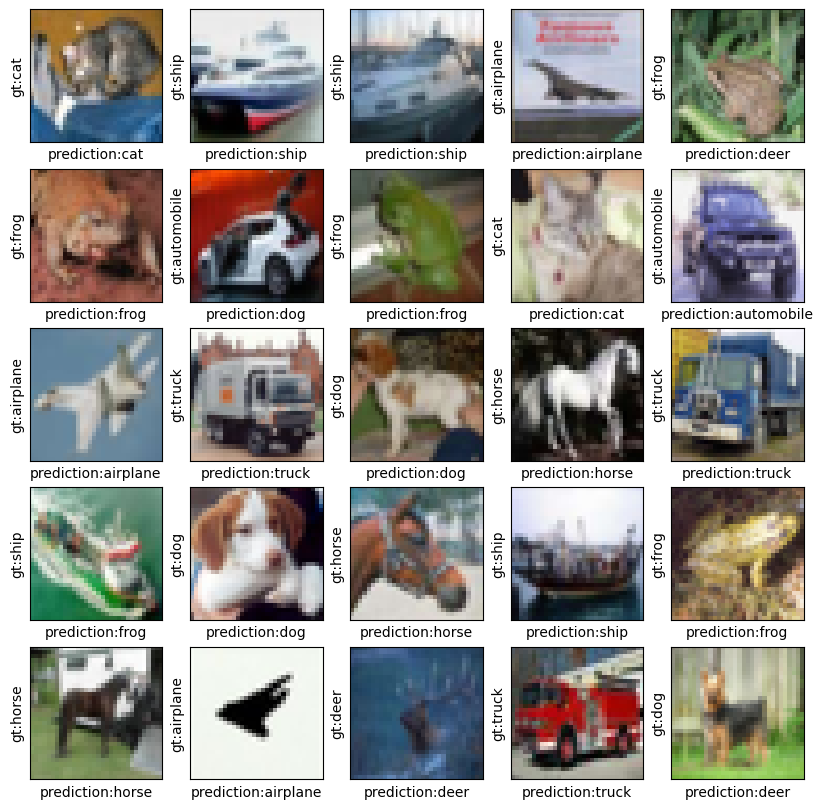

In [78]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(f'prediction:{classes[np.argmax(y_pred[i])]}')
    plt.ylabel(f'gt:{classes[y_test[i]]}')
plt.show()

In [79]:
y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = confusion_matrix(y_predicted_labels,y_test)
cm

313/313 [==============================] - 1s 2ms/step


array([[752,  25,  62,  15,  16,  18,   6,  17,  94,  35],
       [ 29, 827,   4,   6,   5,   5,  10,   2,  26,  97],
       [ 48,   6, 542,  54,  58,  41,  31,  33,   7,   8],
       [ 25,  15,  83, 533,  81, 174,  71,  52,  33,  19],
       [ 26,   8, 106,  78, 657,  40,  42,  56,  12,  10],
       [  8,   8,  71, 174,  43, 606,  22,  82,  12,   8],
       [ 10,  15,  75,  78,  54,  40, 793,  13,   9,  12],
       [ 18,   2,  34,  33,  75,  65,   8, 733,   1,  16],
       [ 57,  29,  13,  15,   6,   5,  12,   2, 776,  27],
       [ 27,  65,  10,  14,   5,   6,   5,  10,  30, 768]], dtype=int64)

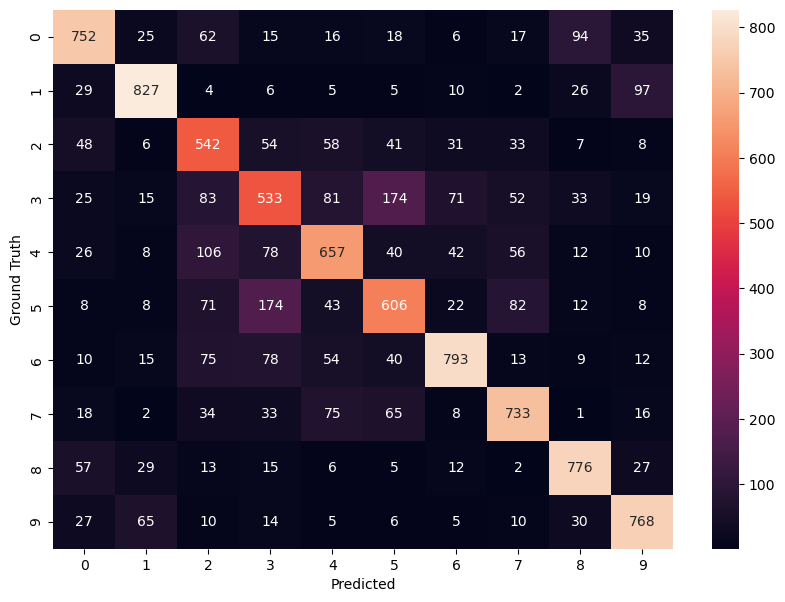

In [80]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.show()

# 7. Predict On Given Image

1/1 [==============================] - 0s 18ms/step
class: 0 name= airplane


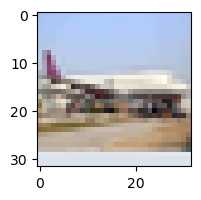

In [81]:
fileImage = Image.open("test_1.jpeg").convert("RGB").resize([32,32],Image.ANTIALIAS)
image = np.array(fileImage)
myimage = image.reshape(1, 32,32,3)
# prepare pixel data
myimage = myimage.astype('float32')
myimage = myimage/255.
plt.figure(figsize = (4,2))
plt.imshow(image)

my_predicted_image = cnn.predict(myimage)
y_class = np.argmax(my_predicted_image)
print("class:",y_class,"name=",classes[y_class])

# 8. Save and Load the model

In [82]:
cnn.save("cnn_cifar_model.h5")

In [83]:
cnn_cifar_model = keras.models.load_model("cnn_cifar_model.h5")

In [84]:
my_predicted_image = cnn_cifar_model.predict(myimage)
y_class = np.argmax(my_predicted_image)
print("Predicted class:",y_class,",","Predicted Class Name=",classes[y_class])

1/1 [==============================] - 1s 728ms/step
Predicted class: 0 , Predicted Class Name= airplane


# 9. Conclusion

In [87]:
# conv1 input (32,32,3)  kernel=(3,3) , filters=32
3*3*3*32+32
# formula wts/parameters = (kernel) * imput image channels * filters + filters

896

In [88]:
# conv2 input (15,15,32)  kernel=(3,3) , filters=64
3*3*32*64+64
# formula wts/parameters = (kernel) * imput image channels * filters + filters

18496

In [89]:
# conv3 input (6,6,64)  kernel=(3,3) , filters=64
3*3*64*64+64
# formula wts/parameters = (kernel) * imput image channels * filters + filters

36928

In [90]:
1024*64+64

65600

In [91]:
64*10+10

650